Fichier supermarket_sales.csv créé avec succès
Information du dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   invoice_id       27611 non-null  object        
 1   date             27611 non-null  datetime64[ns]
 2   timestamp        27611 non-null  datetime64[ns]
 3   product          27611 non-null  object        
 4   category         27611 non-null  object        
 5   quantity         27611 non-null  int64         
 6   unit_price       27611 non-null  float64       
 7   total_sales      27611 non-null  float64       
 8   customer_type    27611 non-null  object        
 9   payment_method   27611 non-null  object        
 10  customer_gender  27611 non-null  object        
 11  customer_age     27611 non-null  object        
 12  rating           27611 non-null  int64         
 13  month            2

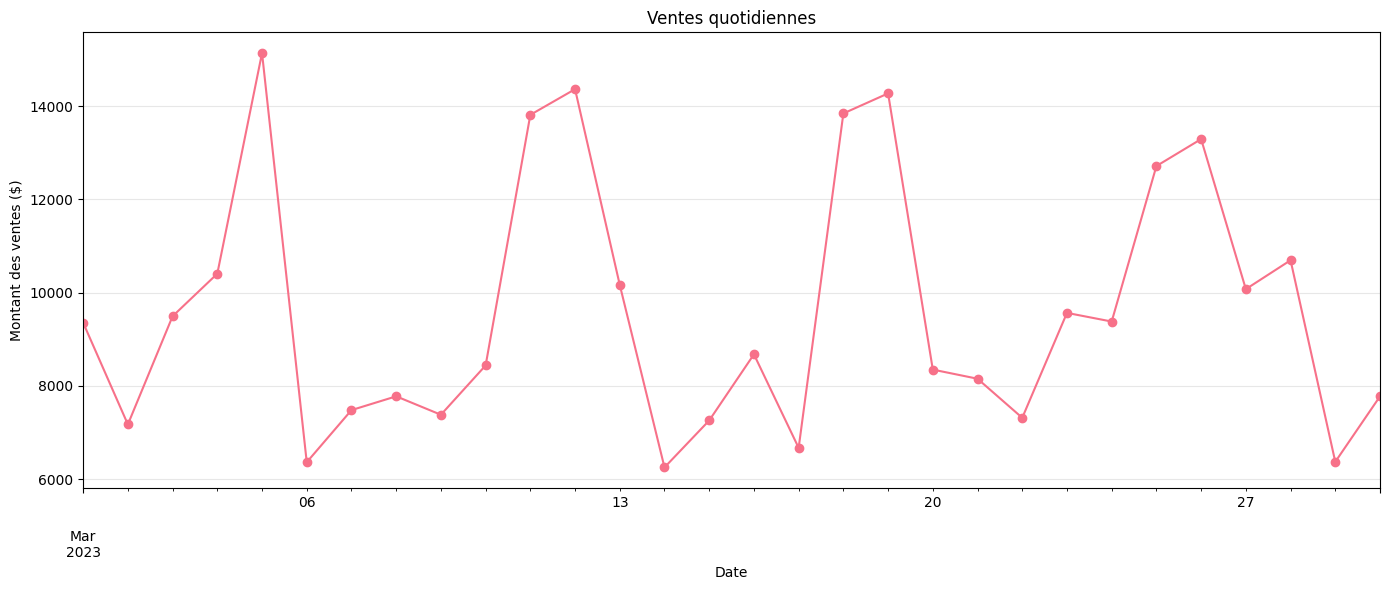

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

def create_supermarket_sales_data():
    products = [
        'Milk','Bread', 'Eggs', 'Butter', 'Cheese', 'Yagurt', 'Chicken', 'Beef', 'Fish', 'Rice', 
        'Pasta', 'Flour','Sugar', 'Coffee', 'Tea', 'Water', 'Juice', 'Beer', 'Wine', 'Apples', 
        'Bananas', 'Oranges', 'Tomatoes', 'Potatoes', 'Shampoo', 'Soap', 'Toothpaste', 'Datergent', 'Toilet Paper'
    ]

    categories = [
        'Dairy', 'Bakery', 'Dairy', 'Dairy', 'Dairy', 'Dairy', 'Meat', 'Meat', 'Seafood', 'Pantry', 
        'Pantry', 'Pantry', 'Pantry', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Alcohol', 'Alcohol', 'Produce', 
        'Produce', 'Produce', 'Produce', 'Produce', 'Personal Care', 'Personal Care', 'Personal Care', 'Household', 'Household'
    ]

    prices = [
        2.99, 4.49, 2.29, 4.99, 5.99, 1.99, 8.99, 12.99, 9.99, 4.99, 1.99, 3.99, 2.99, 7.99, 4.99, 0.99, 3.49,
        1.99, 11.99, 15.99, 1.99, 0.99, 2.49, 2.99, 4.99, 5.99, 2.49, 3.99, 8.99, 6.99
    ]

    product_info = {products[i]: {"category": categories[i], 'price': prices[i]} for i in range(len(products))}

    data = []
    order_id = 1000

    for day in range(1, 31):
        date = f"2023-03-{day:02d}"
        days_of_week = datetime.strptime(date, "%Y-%m-%d").weekday()

        if days_of_week in [5, 6]:
            num_transactions = np.random.randint(120, 180)
        else:
            num_transactions = np.random.randint(80, 130)

        for _ in range(num_transactions):
            num_products = np.random.randint(1, 16)
            hour = np.random.randint(8, 22)
            minute = np.random.randint(0, 60)
            timestamp = f"{date} {hour:02d}:{minute:02d}:00"

            customer_type = np.random.choice(['Member', 'Regular'], p=[0.6, 0.4])
            payment_method = np.random.choice(['Cash', 'Credit Cart', 'Debit Card'], p=[0.3, 0.4, 0.3])
            customer_gender = np.random.choice(['Male', 'Fmale'])
            customer_age = np.random.choice(['18-25', '26-35', '36-45', '46-55', '56+'])
            rating = np.random.randint(3, 6)
            transaction_products = np.random.choice(products, num_products, replace=True)

            for product in transaction_products:
                category = product_info[product]['category']
                base_price = product_info[product]['price']

                price = base_price * (1 + np.random.uniform(-0.05, 0.05))
                quantity = np.random.randint(1, 4)
                sales = quantity * price

                data.append({
                    'invoice_id': f"INV-{order_id}",
                    'date': date,
                    'timestamp': timestamp,
                    'product': product,
                    'category': category,
                    'quantity': quantity,
                    'unit_price': round(price, 2),
                    'total_sales': round(sales, 2),
                    'customer_type': customer_type,
                    'payment_method': payment_method,
                    'customer_gender': customer_gender,
                    'customer_age': customer_age,
                    'rating': rating
                })
            order_id += 1

    df = pd.DataFrame(data)
    df.to_csv('supermarket_sales.csv', index=False)
    print("Fichier supermarket_sales.csv créé avec succès")

    return df


df = create_supermarket_sales_data()

df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df['date'].dt.month_name()
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

print("Information du dataset : ")
print("=" * 50)
print(df.info()) 
print("\n" + "=" * 50)
print("\nRésumé statistique : ")
print("=" * 50)
print(df.describe())
print("\n" + "=" * 50)

print("\nValeurs manquantes:")
print("=" * 50)
print(df.isnull().sum())
print("\n" + "=" * 50)

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

plt.figure(figsize=(14, 6))
daily_sales = df.groupby('date')['total_sales'].sum()
daily_sales.plot(kind="line", marker='o')
plt.title("Ventes quotidiennes")
plt.xlabel('Date')
plt.ylabel('Montant des ventes ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

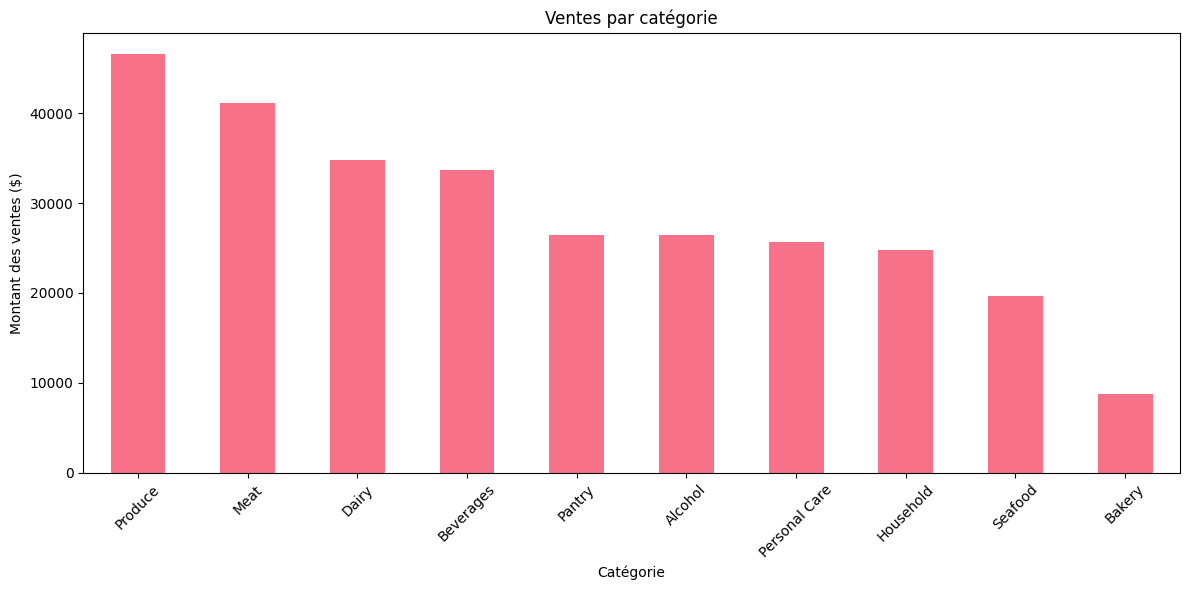

In [18]:
plt.figure(figsize=(12, 6))
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar')
plt.title('Ventes par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

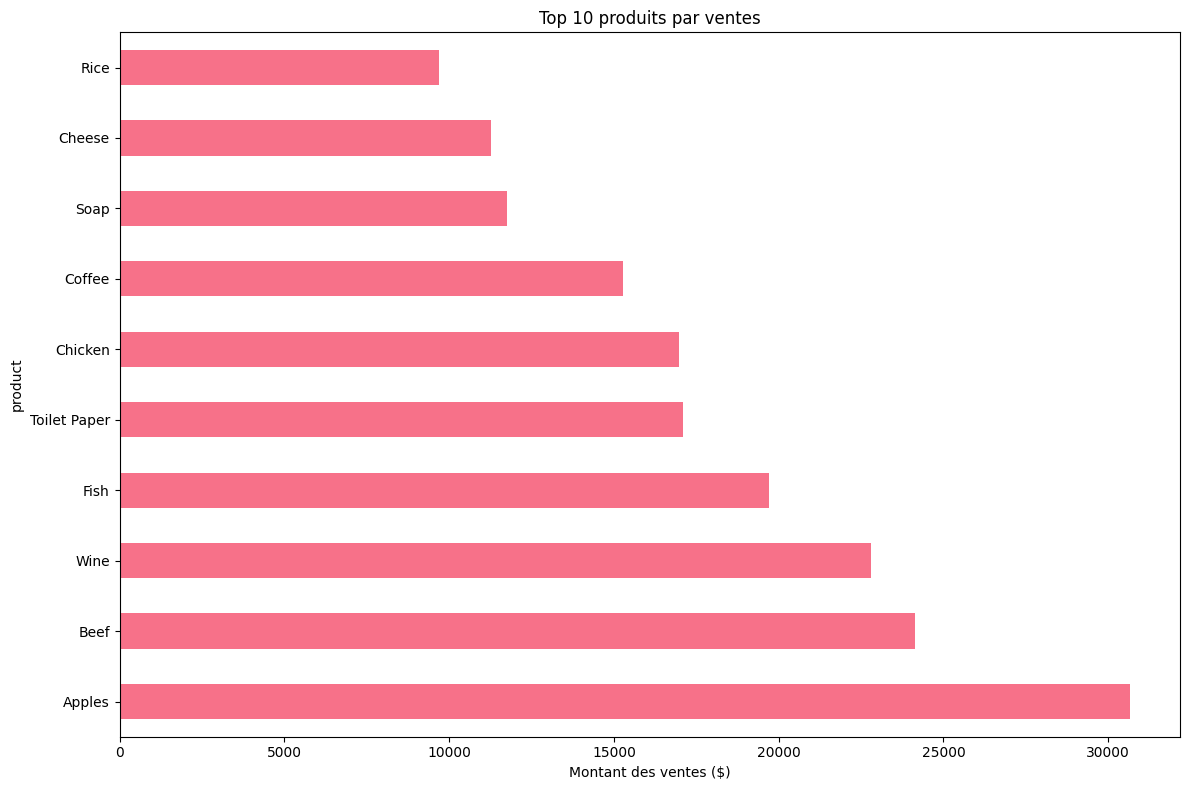

In [19]:
plt.figure(figsize=(12, 8))
top_products = df.groupby('product')['total_sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh")
plt.title("Top 10 produits par ventes")
plt.xlabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

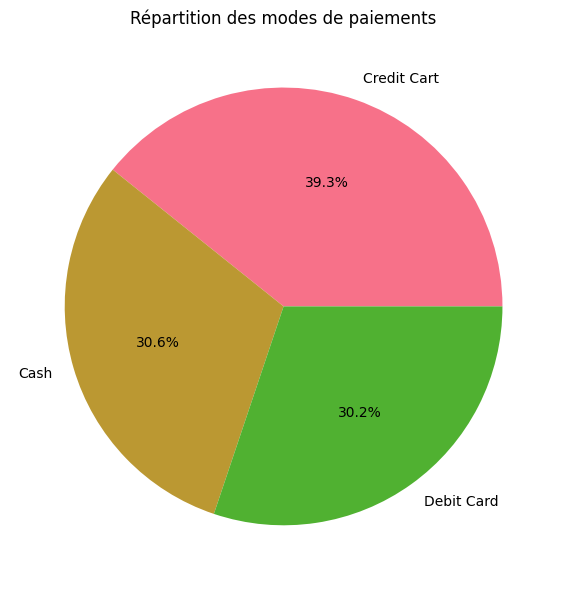

In [20]:
plt.figure(figsize=(10, 6))
payment_counts = df['payment_method'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition des modes de paiements")
plt.ylabel('')
plt.tight_layout()
plt.show()

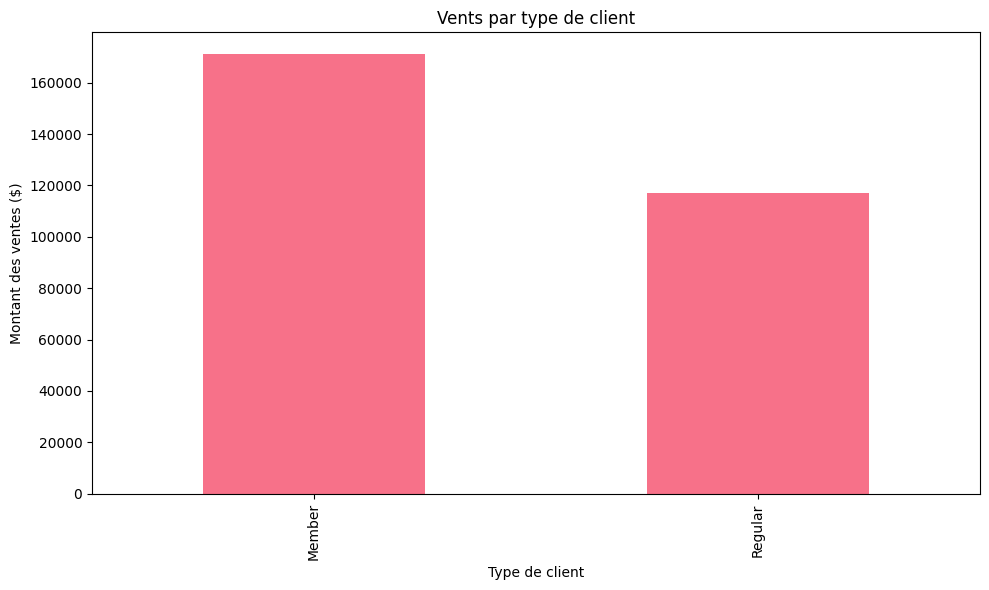

In [22]:
plt.figure(figsize=(10, 6))
customer_sales = df.groupby('customer_type')['total_sales'].sum()
customer_sales.plot(kind = 'bar')
plt.title('Vents par type de client')
plt.xlabel('Type de client')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

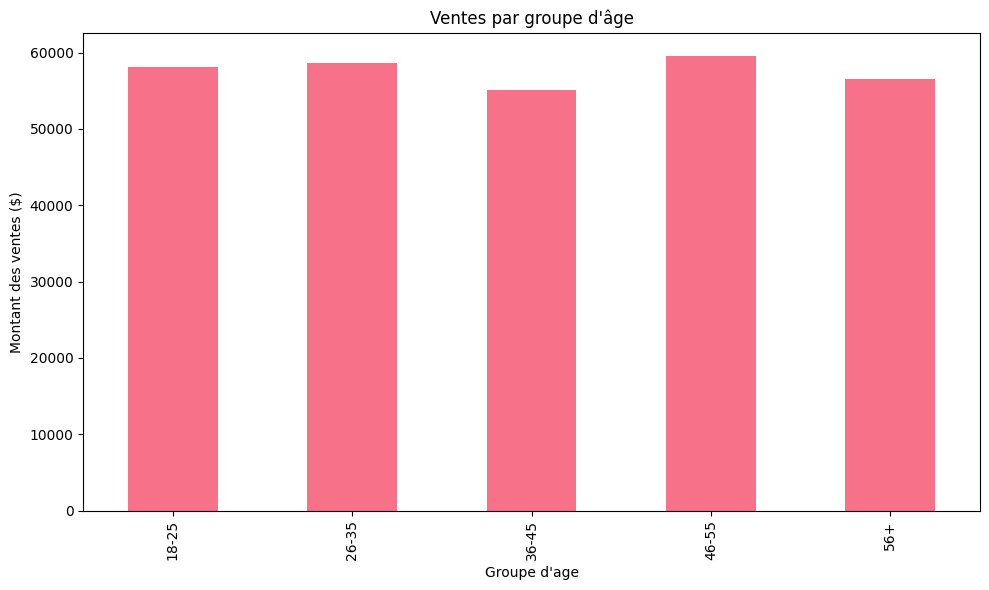

In [23]:
plt.figure(figsize=(10, 6))
age_sales = df.groupby('customer_age')['total_sales'].sum()
age_sales.plot(kind='bar')
plt.title('Ventes par groupe d\'âge')
plt.xlabel('Groupe d\'age')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

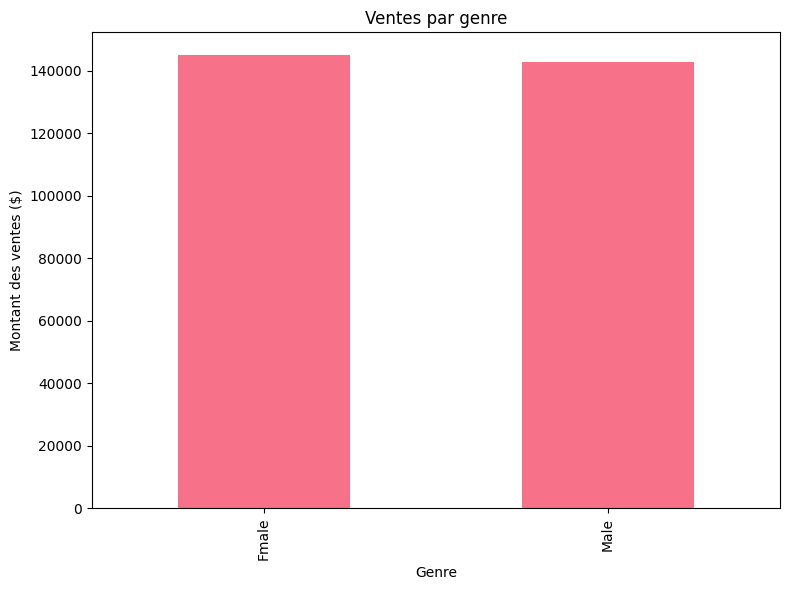

In [24]:
plt.figure(figsize=(8, 6))
gender_sales = df.groupby('customer_gender')['total_sales'].sum()
gender_sales.plot(kind='bar')
plt.title('Ventes par genre')
plt.xlabel('Genre')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

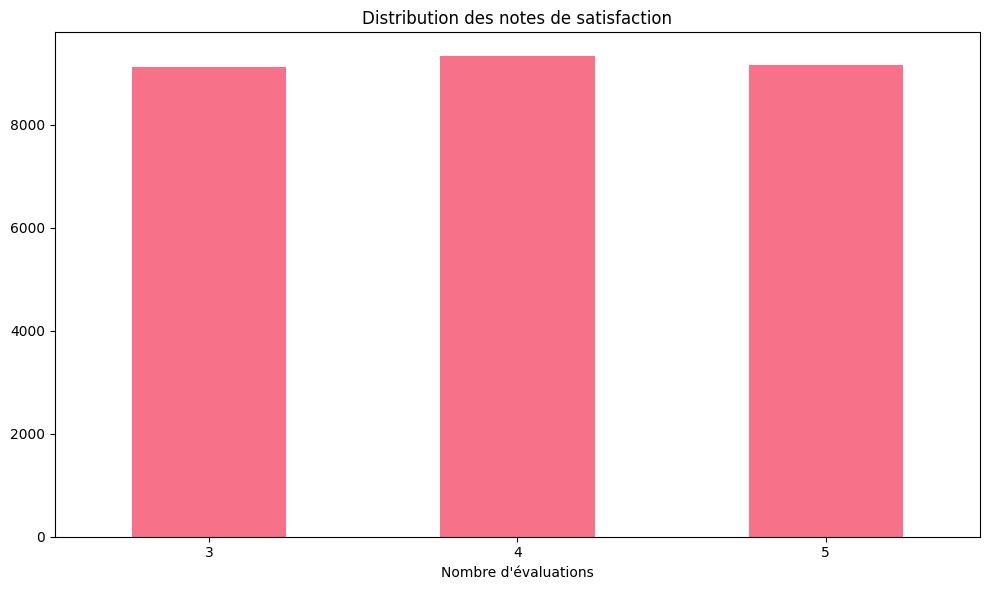

In [25]:
plt.figure(figsize=(10, 6))
rating_counts = df['rating'].value_counts().sort_index()
rating_counts.plot(kind='bar')
plt.title('Distribution des notes de satisfaction')
plt.xlabel('Nombre d\'évaluations')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

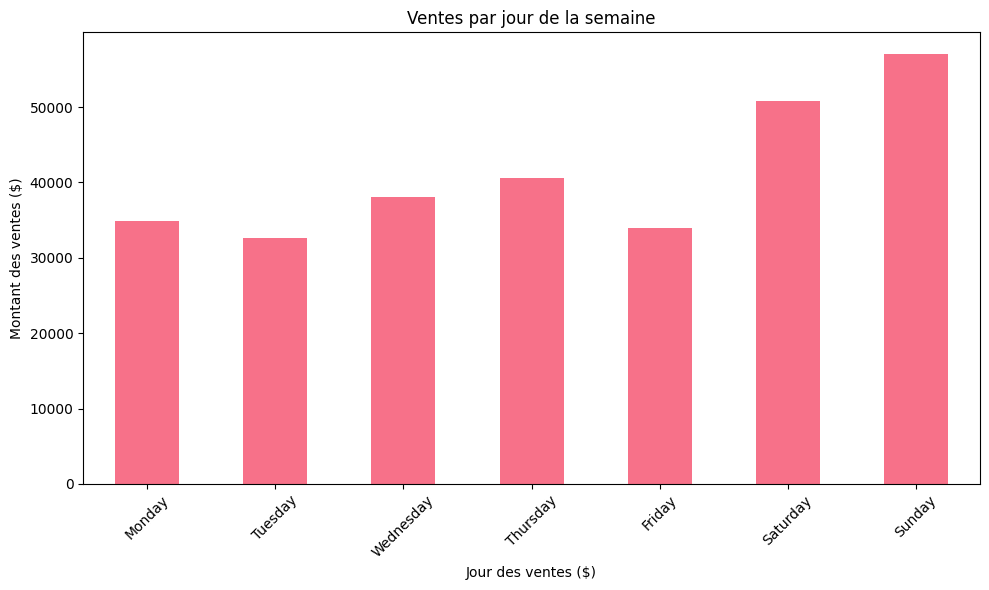

In [26]:
plt.figure(figsize=(10, 6))
day_sales = df.groupby('day_of_week')['total_sales'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex(day_order)
day_sales.plot(kind='bar')
plt.title('Ventes par jour de la semaine')
plt.xlabel('Jour des ventes ($)')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

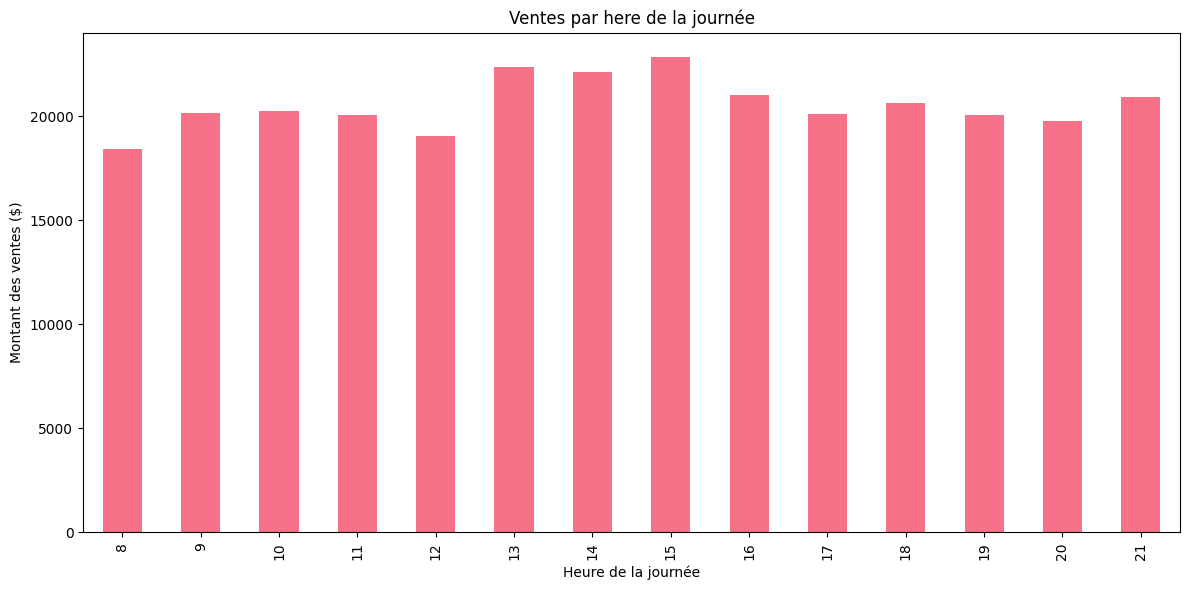

In [27]:
plt.figure(figsize=(12, 6))
hourly_sales = df.groupby('hour')['total_sales'].sum()
hourly_sales.plot(kind='bar')
plt.title('Ventes par here de la journée')
plt.xlabel('Heure de la journée')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

In [33]:
print("\nInformations supplémentaires :")
print('=' * 50)
print(f"Total ventes : ${df['total_sales'].sum():,.2f}")
print(f"Nombre total de transactions : {df['invoice_id'].nunique()}")
print(f"Valeur moyenne par transaction : ${df.groupby('invoice_id')['total_sales'].sum().mean():.2f}")
print(f"Produit le plus vendu (quantité) : {df.groupby('product')['quantity'].sum().idxmax()}")
print(f"catégoris la plus vendur : {df.groupby('category')['total_sales'].sum().idxmax()}")
print(f"Mode de paiement le plus populaire : {df['payment_method'].value_counts().idxmax()}")
print(f"Note moyenne de satisfaction: {df['rating'].mean():.2f} / 5")
print(f"Quantité totale vendue : {df['quantity'].sum()} unités")
print(f"Pourcentage de clients membres : {(df['customer_type'] == 'Member').mean() * 100:.1f}%")

print("\nAperçu des données : ")
print("=" * 50)
print(df.head(10))


Informations supplémentaires :
Total ventes : $288,006.97
Nombre total de transactions : 3524
Valeur moyenne par transaction : $81.73
Produit le plus vendu (quantité) : Fish
catégoris la plus vendur : Produce
Mode de paiement le plus populaire : Credit Cart
Note moyenne de satisfaction: 4.00 / 5
Quantité totale vendue : 55273 unités
Pourcentage de clients membres : 59.7%

Aperçu des données : 
  invoice_id       date           timestamp       product   category  \
0   INV-1000 2023-03-01 2023-03-01 20:12:00       Oranges    Produce   
1   INV-1000 2023-03-01 2023-03-01 20:12:00          Milk      Dairy   
2   INV-1000 2023-03-01 2023-03-01 20:12:00      Potatoes    Produce   
3   INV-1001 2023-03-01 2023-03-01 21:55:00           Tea  Beverages   
4   INV-1001 2023-03-01 2023-03-01 21:55:00        Cheese      Dairy   
5   INV-1001 2023-03-01 2023-03-01 21:55:00           Tea  Beverages   
6   INV-1001 2023-03-01 2023-03-01 21:55:00  Toilet Paper  Household   
7   INV-1001 2023-03-01 20


Analyses avancées : 

Panier moyen par type de client : 
customer_type
Member     81.11
Regular    82.65
Name: total_sales, dtype: float64

Top 10 combinaisons de produits fréquement achetés ensemble:
Datergent + Yagurt : 143 fois
Bread + Butter : 139 fois
Coffee + Juice : 138 fois
Toothpaste + Datergent : 138 fois
Juice + Wine : 138 fois
Coffee + Potatoes : 135 fois
Soap + Datergent : 134 fois
Coffee + Wine : 134 fois
Potatoes + Yagurt : 134 fois
Coffee + Milk : 133 fois

Ventes en semaine : $180,160.56
Ventes le weekend : $107,846.41
Ratio weekend/semaine : 59.86%

Heures de pointe : 15, 13, 14h

Corrélation entre note et montant des ventes : 0.021


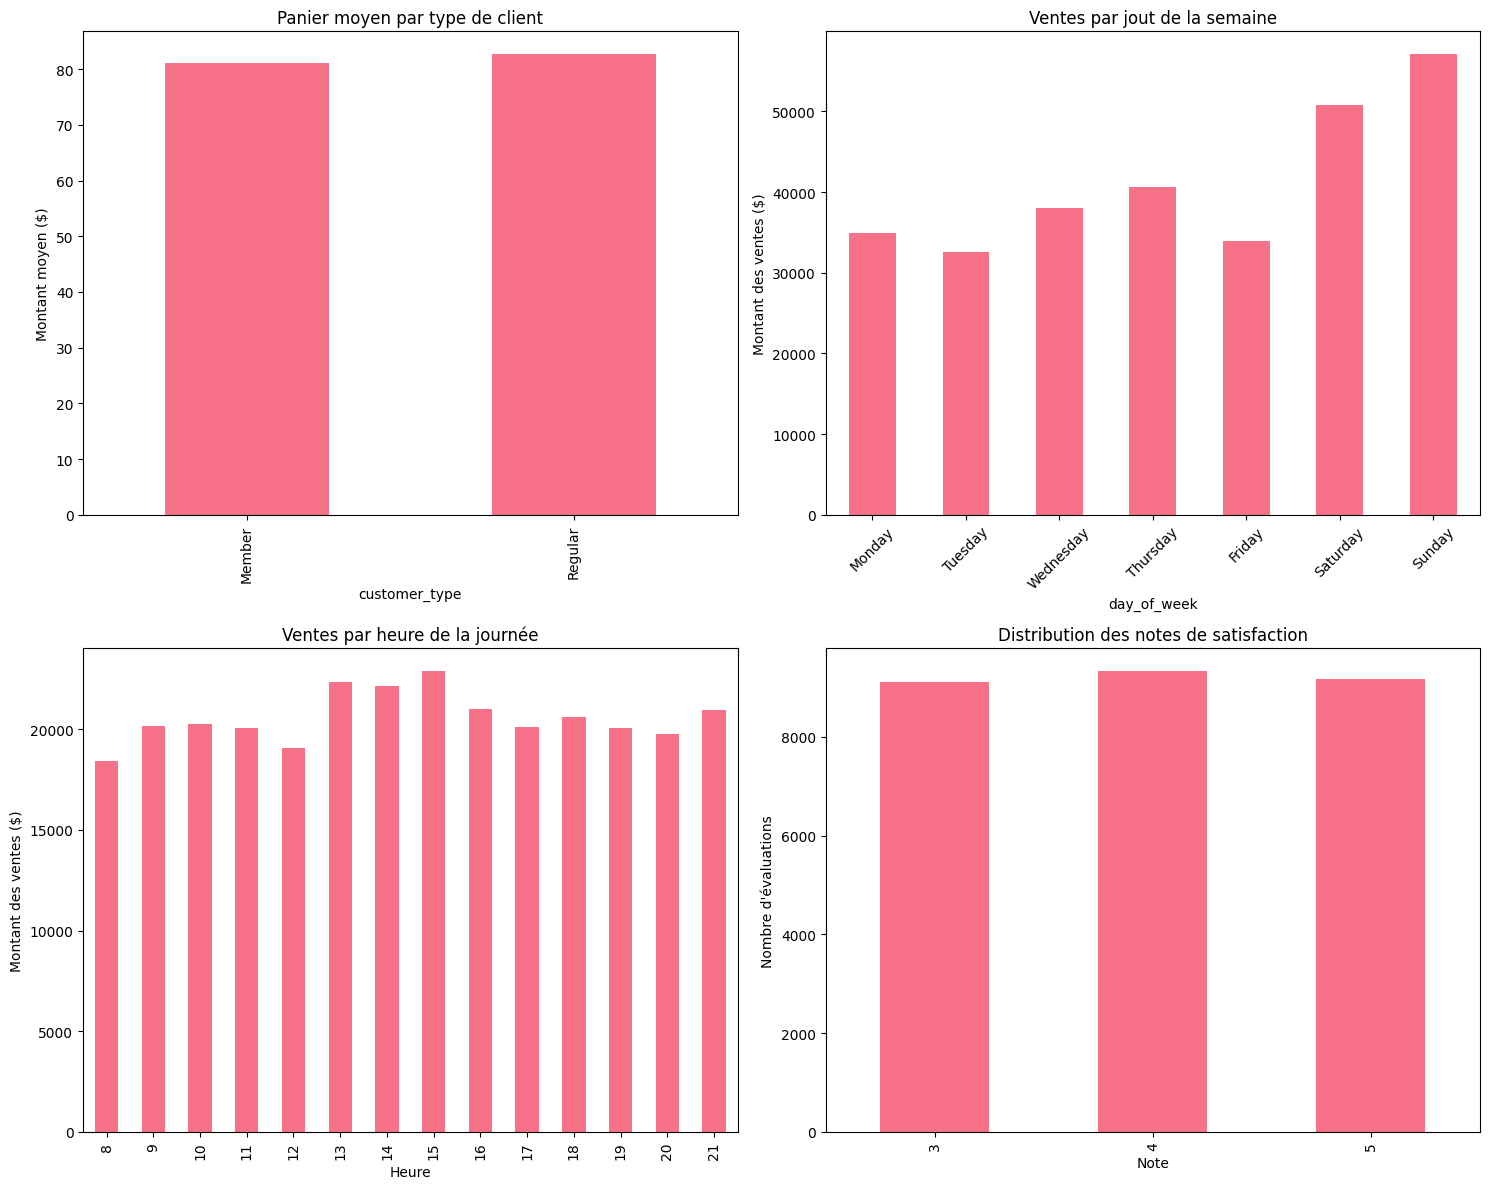

In [40]:
print("\nAnalyses avancées : ")
print("=" * 50)

basket_size = df.groupby(['invoice_id', 'customer_type'])['total_sales'].sum().reset_index()
avg_basket = basket_size.groupby('customer_type')['total_sales'].mean()
print("\nPanier moyen par type de client : ")
print(avg_basket.round(2))

from itertools import combinations
from collections import defaultdict

product_pairs = defaultdict(int)

for invoice in df['invoice_id'].unique():
    invoice_products = df[df['invoice_id'] == invoice]['product'].unique()
    if len(invoice_products) > 1:
        for pair in combinations(invoice_products, 2):
            product_pairs[pair] += 1

top_pairs = sorted(product_pairs.items(), key=lambda x : x[1], reverse=True)[:10]
print("\nTop 10 combinaisons de produits fréquement achetés ensemble:")
for pair, count in top_pairs:
    print(f"{pair[0]} + {pair[1]} : {count} fois")


weekday_sales = df.groupby('day_of_week')['total_sales'].sum()
weekend_mask = df['day_of_week'].isin(['Saturday', 'Sunday'])
weekend_sales = df[weekend_mask]['total_sales'].sum()
weekday_sales_total = df[~weekend_mask]['total_sales'].sum()

print(f"\nVentes en semaine : ${weekday_sales_total:,.2f}")
print(f"Ventes le weekend : ${weekend_sales:,.2f}")
print(f"Ratio weekend/semaine : {weekend_sales / weekday_sales_total:.2%}")

peak_hours = df.groupby('hour')['total_sales'].sum().sort_values(ascending=False).head(3)
print(f"\nHeures de pointe : {', '.join([str(h) for h in peak_hours.index])}h")

rating_sales_corr = df.groupby('invoice_id').agg({'rating': 'first', 'total_sales': 'sum'})[['rating', 'total_sales']].corr().iloc[0, 1]
print(f"\nCorrélation entre note et montant des ventes : {rating_sales_corr:.3f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

avg_basket.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Panier moyen par type de client')
axes[0, 0].set_ylabel('Montant moyen ($)')

weekday_sales.reindex(day_order).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Ventes par jout de la semaine')
axes[0, 1].set_ylabel('Montant des ventes ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

hourly_sales.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Ventes par heure de la journée')
axes[1, 0].set_xlabel('Heure')
axes[1, 0].set_ylabel('Montant des ventes ($)')

rating_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Distribution des notes de satisfaction')
axes[1, 1].set_xlabel('Note')
axes[1, 1].set_ylabel('Nombre d\'évaluations')

plt.tight_layout()
plt.show()

In [45]:
summary_data = {
    'Metric' : [
        'Total Sales', 'Number of Transactions', 'Average Transaction Value', 'Most Sold Product (Quantity)',
        'Top Category by Revenue', 'Most Popular Payment Method', 'Average Rating', 'Weekend/Weekday Sales Ratio', 'Peal Hours'
    ],

    'Value': [
        f"${df['total_sales'].sum():,.2f}",
        f"{df['invoice_id'].nunique()}",
        f"${df.groupby('invoice_id')['total_sales'].sum().mean():.2f}",
        df.groupby('product')['quantity'].sum().idxmax(),
        df.groupby('category')['total_sales'].sum().idxmax(),
        df['payment_method'].value_counts().idxmax(),
        f"{df['rating'].mean():.2f}/5",
        f"{weekend_sales/weekday_sales_total:.2%}",
        f"{', '.join([str(h) for h in peak_hours.index])}h"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\nRésumé des performances : ")
print("=" * 50)
print(summary_df)

summary_df.to_csv('supermarket_summary.csv', index=False)
print("\nRésumé sauvgardé dans supermarket_summary.csv")

category_summary = df.groupby('category').agg({
    'total_sales' : 'sum',
    'quantity': 'sum',
    'invoice_id': 'nunique'
}).round(2).sort_values('total_sales', ascending=False)

category_summary.to_csv('category_performance.csv')
print('Performance par catégorue sauvgardées dans category_performance.csv')

product_summary = df.groupby('product').agg({
    'total_sales' : 'sum',
    'quantity': 'sum',
    'unit_price': 'mean',
    'rating': 'mean'
}).round(2).sort_values('total_sales', ascending=False)

product_summary.to_csv('product_performance.csv')
print('Performances par produits sauvgardées dans product_performance.csv')


Résumé des performances : 
                         Metric        Value
0                   Total Sales  $288,006.97
1        Number of Transactions         3524
2     Average Transaction Value       $81.73
3  Most Sold Product (Quantity)         Fish
4       Top Category by Revenue      Produce
5   Most Popular Payment Method  Credit Cart
6                Average Rating       4.00/5
7   Weekend/Weekday Sales Ratio       59.86%
8                    Peal Hours  15, 13, 14h

Résumé sauvgardé dans supermarket_summary.csv
Performance par catégorue sauvgardées dans category_performance.csv
Performances par produits sauvgardées dans product_performance.csv
